In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
import time
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

sns.set_style('darkgrid')

In [3]:
tag= pd.read_csv("categories.csv", 
                  sep=';', 
                  names=["index", "titleTag", "data1", "data2"])

In [4]:
tag

,index,titleTag,data1,data2
0,1,سیاسی,2016-02-29 15:22:59,2016-02-29 15:27:23
1,5,ورزشی,2016-05-31 13:57:29,2016-05-31 13:57:29
2,7,فناوری اطلاعات,2016-06-12 18:53:52,2016-06-12 18:53:52
3,8,فرهنگی,2016-06-12 18:54:10,2016-06-12 18:54:10
4,9,اقتصادی,2016-06-14 11:02:22,2016-06-14 11:02:22
...,...,...,...,...
118,127,مناطق,2018-05-09 12:16:57,2018-05-09 12:16:57
119,128,اخبار کوتاه,2018-05-09 13:04:54,2018-05-09 13:04:54
120,129,بازار,2018-05-12 13:20:44,2018-05-12 13:20:44
121,130,مقاله,2018-06-09 10:12:54,2018-06-09 10:12:54


In [5]:
df = pd.read_csv("Data.csv")
df

,content,title,lead,agency,date_created,url,image,category
0,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,13,1494518193,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...,uploads/2017/05/11/1589793661.jpg,15
1,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,معنویت در عصر آخرالزمان احیا می‌شود,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,1,1494521817,http://www.farsnews.com/13960221001386,uploads/2017/05/11/1713799235.jpg,20
2,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,36,1494521741,http://www.irna.ir/fa/News/82525960/,uploads/2017/05/11/2561366787.jpg,5
3,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,13,1494522037,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...,uploads/2017/05/11/109987278.jpg,8
4,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,13,1494521914,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...,uploads/2017/05/11/3295317773.jpg,7
...,...,...,...,...,...,...,...,...
9995,به گزارش خبرنگار گروه استان های باشگاه خبرن...,پیام تبریک استاندار برای خلق حماسه سیاسی,فریدون همتی استاندار قزوین با صدور پیامی خلق ح...,21,1495289672,http://www.yjc.ir/fa/news/6095495/%D9%BE%DB%8C...,uploads/2017/05/20/2665703450.jpg,78
9996,به گزارش گروه استان های باشگاه خبرنگاران جوا...,تقدیر استاندار اصفهان از حضور پرشور مردم اصفها...,استاندار اصفهان با صدور پیامی با تقدیر از هموط...,21,1495289708,http://www.yjc.ir/fa/news/6095498/%D8%AA%D9%82...,uploads/2017/05/20/264666546.jpg,64
9997,سرهنگ کشواد بهروزی زاده در گفت و گو با خبرنگا...,بروز 2 فقره تصادف در سیستان و بلوچستان 4 کشته ...,زاهدان - ایرنا - فرمانده پلیس راه شمال سیستان ...,2,1495289726,http://www.irna.ir/fa/News/82538677/,uploads/2017/05/20/1678039667.jpg,15
9998,به گزارش خبرگزاری اهل‌بیت(ع) ـ ابنا ـ امیر کوی...,پیام تبریک امیر کویت و رؤسای جمهوری سوریه و رو...,NaN,256,1495289727,http://fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%d...,False,101


In [6]:
df['year_month_day'] = '2017-05-11'
df['hour'] = '00:00:00'
for i in range(10000):
    string = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df['date_created'][i]))
    string = string.split(" ")
    date = string[0]
    hour = string[1]
    df.loc[i,'year_month_day'] = date
    df.loc[i,'hour'] = hour

df

,content,title,lead,agency,date_created,url,image,category,year_month_day,hour
0,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,13,1494518193,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...,uploads/2017/05/11/1589793661.jpg,15,2017-05-11,20:26:33
1,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,معنویت در عصر آخرالزمان احیا می‌شود,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,1,1494521817,http://www.farsnews.com/13960221001386,uploads/2017/05/11/1713799235.jpg,20,2017-05-11,21:26:57
2,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,36,1494521741,http://www.irna.ir/fa/News/82525960/,uploads/2017/05/11/2561366787.jpg,5,2017-05-11,21:25:41
3,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,13,1494522037,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...,uploads/2017/05/11/109987278.jpg,8,2017-05-11,21:30:37
4,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,13,1494521914,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...,uploads/2017/05/11/3295317773.jpg,7,2017-05-11,21:28:34
...,...,...,...,...,...,...,...,...,...,...
9995,به گزارش خبرنگار گروه استان های باشگاه خبرن...,پیام تبریک استاندار برای خلق حماسه سیاسی,فریدون همتی استاندار قزوین با صدور پیامی خلق ح...,21,1495289672,http://www.yjc.ir/fa/news/6095495/%D9%BE%DB%8C...,uploads/2017/05/20/2665703450.jpg,78,2017-05-20,18:44:32
9996,به گزارش گروه استان های باشگاه خبرنگاران جوا...,تقدیر استاندار اصفهان از حضور پرشور مردم اصفها...,استاندار اصفهان با صدور پیامی با تقدیر از هموط...,21,1495289708,http://www.yjc.ir/fa/news/6095498/%D8%AA%D9%82...,uploads/2017/05/20/264666546.jpg,64,2017-05-20,18:45:08
9997,سرهنگ کشواد بهروزی زاده در گفت و گو با خبرنگا...,بروز 2 فقره تصادف در سیستان و بلوچستان 4 کشته ...,زاهدان - ایرنا - فرمانده پلیس راه شمال سیستان ...,2,1495289726,http://www.irna.ir/fa/News/82538677/,uploads/2017/05/20/1678039667.jpg,15,2017-05-20,18:45:26
9998,به گزارش خبرگزاری اهل‌بیت(ع) ـ ابنا ـ امیر کوی...,پیام تبریک امیر کویت و رؤسای جمهوری سوریه و رو...,NaN,256,1495289727,http://fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%d...,False,101,2017-05-20,18:45:27


## ترسیم نمودار فراوانی 10 دسته خبر پرتکرار در دادگان خبری را، به ازای 10.000 خبر ابتدایی

In [6]:
count_category = pd.get_dummies(df["category"])
sum_categories = count_category.sum()
sum_categories = sum_categories.sort_values()
top_10_sum_categories = sum_categories[64:74]
# top_10_sum_categories
sum_categories

47       1
95       1
48       1
41       2
42       2
      ... 
101    846
5      860
9      884
10     911
1      955
Length: 74, dtype: int64

In [7]:
type(top_10_sum_categories)
top10data = pd.DataFrame(top_10_sum_categories)

top10data

,0
31,249
8,354
32,397
15,526
20,782
101,846
5,860
9,884
10,911
1,955


In [8]:
top10data.index[5]

101

In [9]:
for i in range(10):
    if i == 0 :
        d = tag[(tag['index'] == top10data.index[i])]
    else:
        d = d.append(tag[(tag['index'] == top10data.index[i])])


In [10]:
d

,index,titleTag,data1,data2
22,31,خراسان رضوی,2016-07-13 16:32:50,2016-07-13 16:32:50
3,8,فرهنگی,2016-06-12 18:54:10,2016-06-12 18:54:10
23,32,اخبار,2016-07-13 16:53:38,2016-07-13 16:53:38
10,15,اجتماعی,2016-06-26 16:58:22,2016-06-26 16:58:22
14,20,استانها,2016-06-26 17:38:08,2016-06-26 17:38:08
92,101,کل اخبار,2017-02-18 12:34:40,2017-02-18 12:34:40
1,5,ورزشی,2016-05-31 13:57:29,2016-05-31 13:57:29
4,9,اقتصادی,2016-06-14 11:02:22,2016-06-14 11:02:22
5,10,بین الملل,2016-06-14 11:04:52,2016-06-14 11:04:52
0,1,سیاسی,2016-02-29 15:22:59,2016-02-29 15:27:23


In [11]:
from tkinter import*
barname=Tk()

In [12]:
pip install arabic-reshaper


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install python-bidi


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
def t(text):
    return get_display(arabic_reshaper.reshape(u'%s' %str(text)))


In [13]:
x1 = ['','','','','','','','','','']
x = d['titleTag']
len(x)


10

In [15]:
for i in range(len(x)):
    x1[i] = t(x.iloc[i])

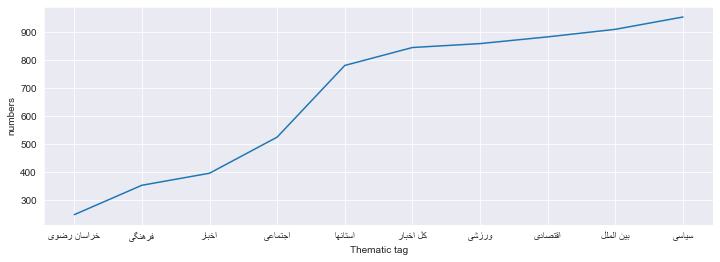

In [18]:
y = top_10_sum_categories
plt.figure(figsize=(12,4))
plt.plot(x1, y)
plt.xlabel('Thematic tag')
plt.ylabel('numbers')
plt.show()

##  ترسیم نرخ انتشار مقالات را بر اساس تاریخ و نمودار تعداد انتشار مقالات بر حسب زمان انتشار، می بایست مرتب شده باشد

In [19]:
df_date = df[['year_month_day']]

In [20]:
df_date = pd.get_dummies(df_date).sum()
df_date

year_month_day_2017-05-11     206
year_month_day_2017-05-12    1712
year_month_day_2017-05-13    1214
year_month_day_2017-05-19     832
year_month_day_2017-05-20    2691
year_month_day_2017-05-21    2937
year_month_day_2017-05-22     408
dtype: int64

In [21]:
type(df_date)
df_date1 = pd.DataFrame(df_date)
df_date1

,0
year_month_day_2017-05-11,206
year_month_day_2017-05-12,1712
year_month_day_2017-05-13,1214
year_month_day_2017-05-19,832
year_month_day_2017-05-20,2691
year_month_day_2017-05-21,2937
year_month_day_2017-05-22,408


In [22]:
df_date1[0]

year_month_day_2017-05-11     206
year_month_day_2017-05-12    1712
year_month_day_2017-05-13    1214
year_month_day_2017-05-19     832
year_month_day_2017-05-20    2691
year_month_day_2017-05-21    2937
year_month_day_2017-05-22     408
Name: 0, dtype: int64

In [23]:
x = df_date1.index
x1 = [0,0,0,0,0,0,0]
for i in range(len(x)):
    x1[i] = x[i].split("year_month_day_")[1]
    
y = df_date
x = x1
x

['2017-05-11',
 '2017-05-12',
 '2017-05-13',
 '2017-05-19',
 '2017-05-20',
 '2017-05-21',
 '2017-05-22']

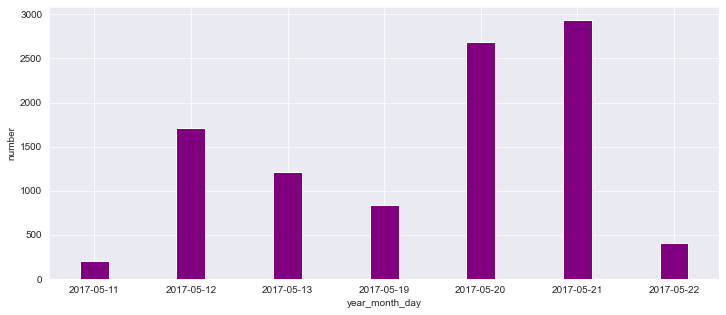

In [24]:
plt.figure(figsize=(12, 5))
bar_width = 0.3
plt.bar(x, y, width=bar_width, color='purple')
plt.xlabel('year_month_day')
plt.ylabel('number')
plt.show()

## ترسیم نمودار فراوانی مقالات منتشر شده را بر حسب نام آژانس خبری مربوطه

In [25]:
df3 = df.url.str.split("//")
df3[1][1].split(".")
# len(df3[2])
df3

0       [http:, www.khabaronline.ir/(X(1)S(bud4wg3ebzb...
1                [http:, www.farsnews.com/13960221001386]
2                  [http:, www.irna.ir/fa/News/82525960/]
3       [http:, www.khabaronline.ir/(X(1)S(nducmtisxqh...
4       [http:, www.khabaronline.ir/(X(1)S(uupfbn0kvlt...
                              ...                        
9995    [http:, www.yjc.ir/fa/news/6095495/%D9%BE%DB%8...
9996    [http:, www.yjc.ir/fa/news/6095498/%D8%AA%D9%8...
9997               [http:, www.irna.ir/fa/News/82538677/]
9998    [http:, fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%...
9999    [http:, www.asriran.com/fa/news/540053/%D9%85%...
Name: url, Length: 10000, dtype: object

In [26]:
string = df3[2][1].split("www.")[1].split(".ir")
# string = df3[1][1].split(".com")
string

['irna', '/fa/News/82525960/']

In [27]:
df['name_agency'] = 'a'
for i in range(10000):
    if df3[i][1].startswith("www"):
        string = df3[i][1].split("www.")[1].split(".ir")
        if len(string) == 1:
            string = df3[i][1].split("www.")[1].split(".com")[0]    
        else:
            string = string[0]
    else:
        string = df3[i][1].split(".ir")
        if len(string) == 1:
            string = df3[i][1].split(".com")[0]
        else :
            string = string[0]

    df.loc[i,'name_agency'] = string




In [28]:
df

,content,title,lead,agency,date_created,url,image,category,year_month_day,hour,name_agency
0,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,13,1494518193,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...,uploads/2017/05/11/1589793661.jpg,15,2017-05-11,20:26:33,khabaronline
1,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,معنویت در عصر آخرالزمان احیا می‌شود,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,1,1494521817,http://www.farsnews.com/13960221001386,uploads/2017/05/11/1713799235.jpg,20,2017-05-11,21:26:57,farsnews
2,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,36,1494521741,http://www.irna.ir/fa/News/82525960/,uploads/2017/05/11/2561366787.jpg,5,2017-05-11,21:25:41,irna
3,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,13,1494522037,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...,uploads/2017/05/11/109987278.jpg,8,2017-05-11,21:30:37,khabaronline
4,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,13,1494521914,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...,uploads/2017/05/11/3295317773.jpg,7,2017-05-11,21:28:34,khabaronline
...,...,...,...,...,...,...,...,...,...,...,...
9995,به گزارش خبرنگار گروه استان های باشگاه خبرن...,پیام تبریک استاندار برای خلق حماسه سیاسی,فریدون همتی استاندار قزوین با صدور پیامی خلق ح...,21,1495289672,http://www.yjc.ir/fa/news/6095495/%D9%BE%DB%8C...,uploads/2017/05/20/2665703450.jpg,78,2017-05-20,18:44:32,yjc
9996,به گزارش گروه استان های باشگاه خبرنگاران جوا...,تقدیر استاندار اصفهان از حضور پرشور مردم اصفها...,استاندار اصفهان با صدور پیامی با تقدیر از هموط...,21,1495289708,http://www.yjc.ir/fa/news/6095498/%D8%AA%D9%82...,uploads/2017/05/20/264666546.jpg,64,2017-05-20,18:45:08,yjc
9997,سرهنگ کشواد بهروزی زاده در گفت و گو با خبرنگا...,بروز 2 فقره تصادف در سیستان و بلوچستان 4 کشته ...,زاهدان - ایرنا - فرمانده پلیس راه شمال سیستان ...,2,1495289726,http://www.irna.ir/fa/News/82538677/,uploads/2017/05/20/1678039667.jpg,15,2017-05-20,18:45:26,irna
9998,به گزارش خبرگزاری اهل‌بیت(ع) ـ ابنا ـ امیر کوی...,پیام تبریک امیر کویت و رؤسای جمهوری سوریه و رو...,NaN,256,1495289727,http://fa.abna24.com/news/%d8%a7%d8%ae%d8%a8%d...,False,101,2017-05-20,18:45:27,fa.abna24


In [29]:
name_agency = pd.get_dummies(df['name_agency'])
sum_name_agency = name_agency.sum()
sum_name_agency

abnews             3
aftabnews         35
akharinkhabar    578
albf               1
alborz.isna        5
                ... 
vatanemrooz       46
yasouj.isna        3
yazd.isna         11
yjc              993
zanjan.isna       18
Length: 165, dtype: int64

In [30]:
new_df = pd.DataFrame(sum_name_agency)

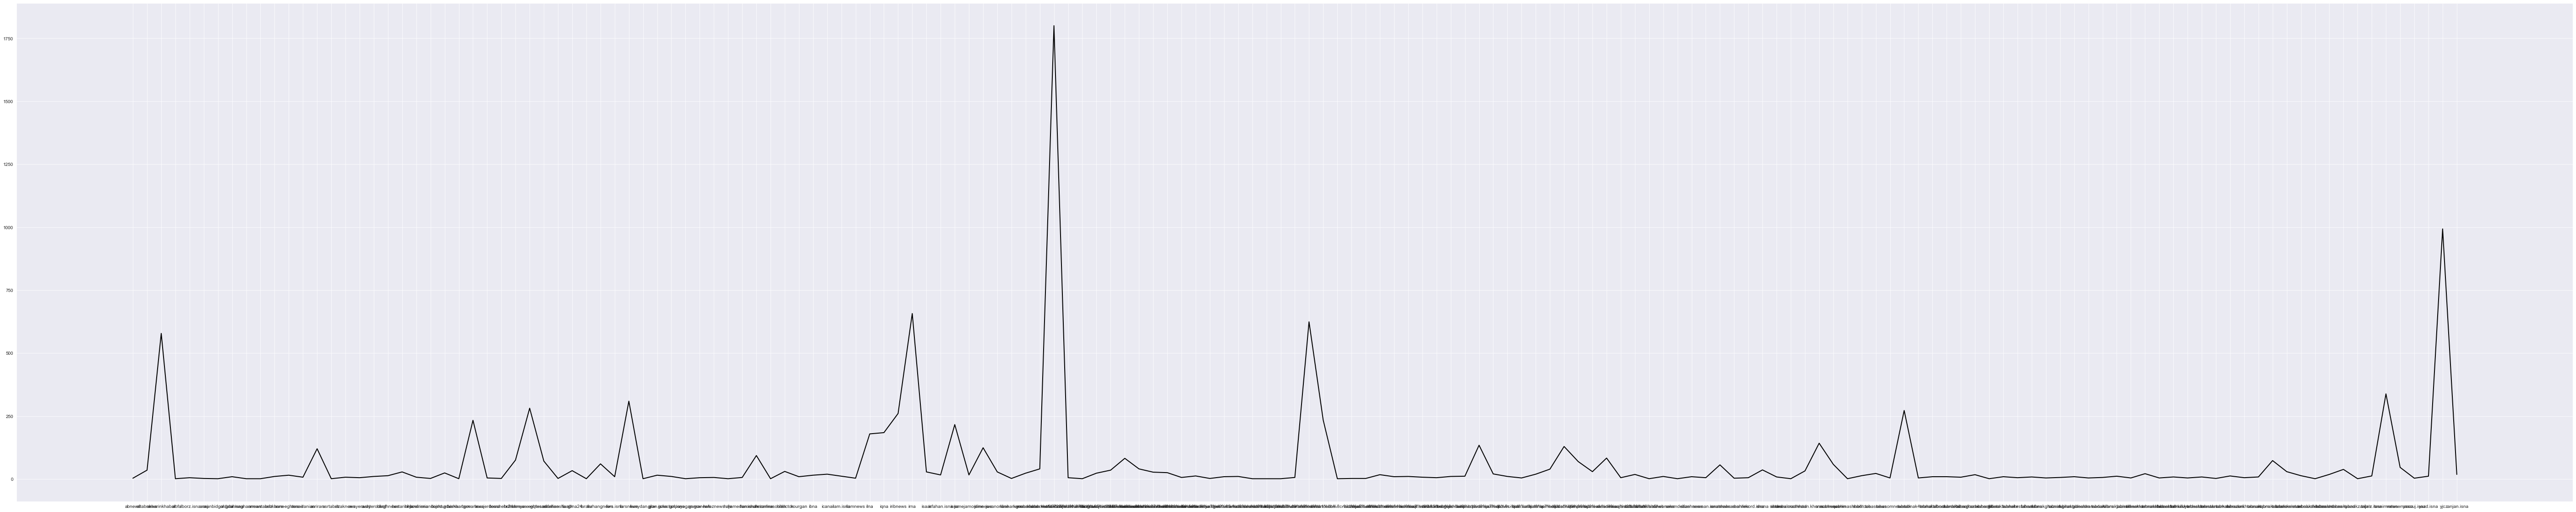

In [31]:
x = new_df.index
y = sum_name_agency
plt.figure(figsize=(100,20))
plt.plot(x, y, 'black',linewidth=2)
plt.show()

In [32]:
sum_name_agency = sum_name_agency.sort_values()
top_10_sum_name_agency = sum_name_agency[155:165]
top_10_sum_name_agency
new_df = pd.DataFrame(top_10_sum_name_agency)
new_df

,0
iribnews,260
tabnak,272
donya-e-eqtesad,281
farsnews,309
tasnimnews,338
akharinkhabar,578
mehrnews,624
irna,657
yjc,993
khabaronline,1800


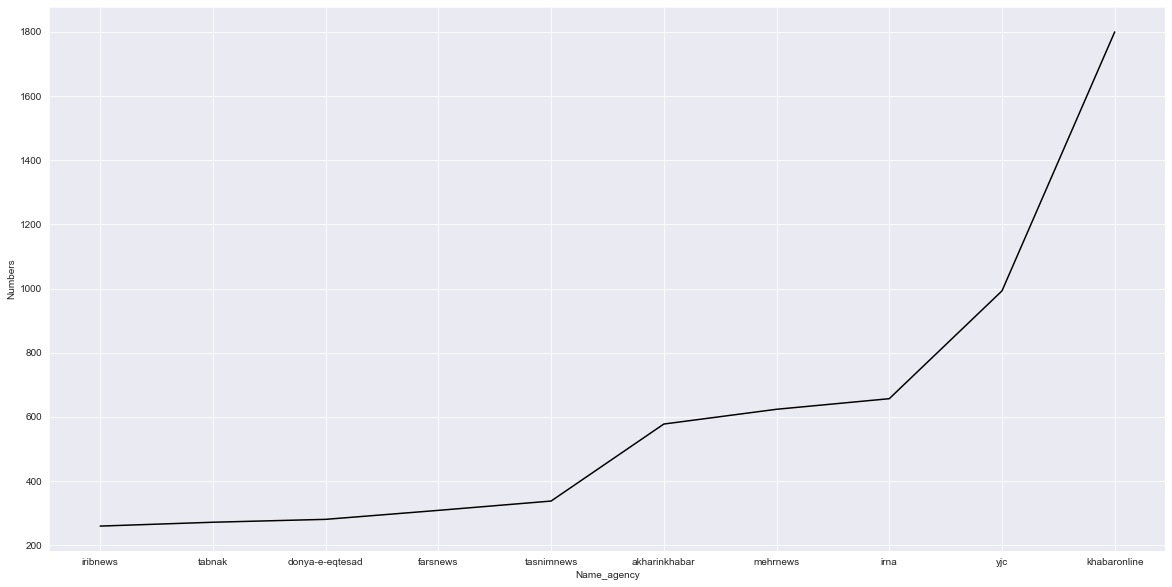

In [34]:
x = new_df.index
y = new_df
plt.figure(figsize=(20,10))
plt.plot(x, y, 'black')
plt.xlabel('Name_agency')
plt.ylabel('Numbers')
plt.show()